## Demo Notebook

This notebook shall walk through the minimal basic functionality of this package, echoing the `README`.

In [1]:
# import
from legomena import Corpus, HeapsModel, InfSeriesModel, LogModel

## Data Sources

This package may be driven by any data source, but the author has tested two: the [Natural Language ToolKit](https://www.nltk.org/) and the [Standard Project Gutenberg Corpus](https://arxiv.org/abs/1812.08092). The former being the gold standard of python NLP applications, but having a rather measly 18-book gutenberg corpus. The latter containing the full 55,000+ book gutenberg corpus, already tokenized and counted. NOTE: The overlap of the two datasets do _not_ agree in their exact type/token counts, their methodology differing, but this package takes type/token counts as raw data and is therefore methodology-agnostic.

In [7]:
# moby dick from NLTK
import nltk
nltk.download("gutenberg")
from nltk.corpus import gutenberg
words = gutenberg.words("melville-moby_dick.txt")
corpus = Corpus(words)
assert corpus.M, corpus.N == (260819, 19317)

# moby dick from SPGC
# NOTE: download and unzip https://zenodo.org/record/2422561/files/SPGC-counts-2018-07-18.zip into DATA_FOLDER
DATA_FOLDER = "../data"
import pandas as pd
fname = "%s/SPGC-counts-2018-07-18/PG2701_counts.txt" % DATA_FOLDER
with open(fname) as f:
    df = pd.read_csv(f, delimiter="\t", header=None, names=["word", "freq"])
    f.close()
wfd = {str(row.word): int(row.freq) for row in df.itertuples()}
corpus = Corpus(wfd)
assert corpus.M, corpus.N == (210258, 16402)

# a corpus is just a dictionary
corpus

[nltk_data] Downloading package gutenberg to /home/victor/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Corpus({'the': 14411,
        'of': 6593,
        'and': 6380,
        'a': 4642,
        'to': 4580,
        'in': 4151,
        'that': 3001,
        'his': 2515,
        'it': 2456,
        'i': 2072,
        'he': 1865,
        's': 1788,
        'but': 1777,
        'as': 1719,
        'with': 1719,
        'is': 1710,
        'was': 1635,
        'for': 1603,
        'all': 1476,
        'this': 1359,
        'at': 1311,
        'not': 1202,
        'by': 1193,
        'from': 1088,
        'whale': 1070,
        'on': 1047,
        'so': 1040,
        'him': 1038,
        'be': 1035,
        'one': 899,
        'you': 875,
        'there': 830,
        'had': 777,
        'now': 767,
        'have': 766,
        'or': 711,
        'were': 680,
        'they': 661,
        'which': 640,
        'their': 619,
        'then': 615,
        'some': 614,
        'me': 609,
        'are': 596,
        'when': 596,
        'what': 591,
        'an': 589,
        'my': 584,
        'like

## Basic Usage


In [6]:
# basic properties
corpus.tokens  # list of tokens
corpus.types  # list of types
corpus.fdist  # word frequency distribution dataframe
corpus.WFD  # alias for corpus.fdist
corpus.M  # number of tokens
corpus.N  # number of types
corpus.k  # n-legomena vector
corpus.k[1]  # n-legomena count (n=1 -> number of hapaxes)
corpus.hapax  # list of hapax legomena, alias for corpus.nlegomena(1)
corpus.dis  # list of dis legomena, alias for corpus.nlegomena(2)
corpus.tris  # list of tris legomena, alias for corpus.nlegomena(3)
corpus.tetrakis  # list of tetrakis legomena, alias for corpus.nlegomena(4)
corpus.pentakis  # list of pentakis legomena, alias for corpus.nlegomena(5)

# advanced properties
corpus.options  # tuple of optional settings
corpus.resolution  # number of samples to take to calculate TTR curve
corpus.dimension  # n-legomena vector length to pre-compute (max 6)
corpus.seed  # random number seed for sampling TTR data
corpus.TTR  # type-token ratio dataframe

# basic functions
corpus.nlegomena(n=1)  # list of types occurring exactly n times
corpus.sample(m=999)  # samples m tokens from corpus *without replacement*
corpus.sample(x=0.5)  # samples proportion x of corpus *without replacement*


Corpus({'whaling': 57,
        'stood': 42,
        'the': 7228,
        'by': 584,
        'fable': 2,
        'wharves': 4,
        'startled': 2,
        'no': 301,
        'followed': 16,
        'they': 339,
        'all': 734,
        'often': 35,
        'my': 300,
        'ye': 232,
        'seemed': 136,
        'and': 3217,
        'had': 389,
        'squilgee': 1,
        'that': 1508,
        'into': 290,
        'almost': 91,
        'deck': 88,
        'times': 57,
        'put': 31,
        'cellars': 1,
        'good': 91,
        'de': 14,
        'oil': 39,
        'like': 309,
        'with': 848,
        'a': 2284,
        'pipe': 18,
        'shrivel': 1,
        'midnight': 16,
        'aloft': 26,
        'philosophers': 2,
        'heart': 52,
        'whale': 531,
        'to': 2303,
        'it': 1203,
        'way': 124,
        'round': 124,
        'happens': 8,
        'about': 170,
        'wide': 22,
        'if': 258,
        'last': 148,
        'air'

## Type-Token Models

There are a variety of models in the literature predicting number of types as a function of tokens, the most well-known being [Heap's Law](https://en.wikipedia.org/wiki/Heaps%27_law). Here are a few implemented, overlaid by the `Corpus` class.

In [15]:
# three models
hmodel = HeapsModel()  # Heap's Law
imodel = InfSeriesModel(corpus)  # Infinite Series Model [1]
lmodel = LogModel()  # Logarithmic Model [1]

# model fitting
m_tokens = corpus.TTR.m_tokens
n_types = corpus.TTR.n_types
lmodel.fit(m_tokens, n_types)
predictions = lmodel.fit_predict(m_tokens, n_types)

# model parameters
lmodel.params

# model predictions
predictions = lmodel.predict(m_tokens)

# log model only
dim = corpus.dimension
predicted_k = lmodel.predict_k(m_tokens, dim)

## Model Comparison

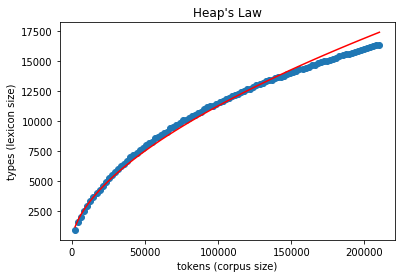

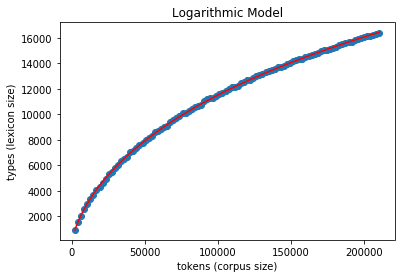

In [16]:
# visualize
import matplotlib.pyplot as plt

# heaps model
hpredictions = hmodel.fit_predict(m_tokens, n_types)
plt.scatter(m_tokens, n_types, label="observed")
plt.plot(m_tokens, hpredictions, label="predicted", color="red")
plt.title("Heap's Law")
plt.xlabel("tokens (corpus size)")
plt.ylabel("types (lexicon size)")
plt.show()

# logarithmic model
plt.scatter(m_tokens, n_types, label="observed")
plt.plot(m_tokens, predictions, label="predicted", color="red")
plt.title("Logarithmic Model")
plt.xlabel("tokens (corpus size)")
plt.ylabel("types (lexicon size)")
plt.show()